# Exoplanets exploration

### Author: Alexander K.

## Overview

In this project explore the exoplanets data that contains information on all known exoplanets (planets outside our solar system) discovered by NASA's various space missions, ground-based observatories, and other sources.        

## Project Goals
The goals of this project are ...

Some questions that are posed:
 - What types of exoplanets exist?
 - question 2
 - question 3
 - etc.

## Actions

- analyze data;
- clean up the datasets;
- visualize the data using graphs and charts;
- seek to answer the questions;
- making conclusions based on the analysis.

## Data

There is dataset:
1. `nasa_exoplanets.csv` - contains information on all known exoplanets.
The dataset includes information such as the planet's name, mass, radius, distance from its host star, orbital period, and other physical characteristics. The dataset also includes information on the host star, such as its name, mass, and radius.

The dataset can be found [here](https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets/data).


## Analysis

In this section, we will employ descriptive statistics and data visualization methods to gain a deeper understanding of the data. Some of the key metrics that will be calculated include:
1. Frequency distributions
1. Counts
1. Relationships between ...
1. etc.

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# setting options
pd.set_option('display.max_columns', None)
# pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('max_colwidth', 0)

In [3]:
# load the dataset

exoplanets = pd.read_csv('nasa_exoplanets.csv')

## Exploratory Data Analysis (EDA)

In [4]:
# inspecting dataset
exoplanets.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


In [5]:
# inspecting dataset
print(f"The shape of the exoplanets dataset is - {exoplanets.shape}")

The shape of the exoplanets dataset is - (5250, 13)


In [6]:
# inspecting dataset
exoplanets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


In [17]:
# counting for missing values
exoplanets.isnull().sum()

name                 0  
distance             17 
stellar_magnitude    161
planet_type          0  
discovery_year       0  
mass_multiplier      23 
mass_wrt             23 
radius_multiplier    17 
radius_wrt           17 
orbital_radius       289
orbital_period       0  
eccentricity         0  
detection_method     0  
dtype: int64

In [7]:
# columns in the dataset
exoplanets.columns.to_list()

['name',
 'distance',
 'stellar_magnitude',
 'planet_type',
 'discovery_year',
 'mass_multiplier',
 'mass_wrt',
 'radius_multiplier',
 'radius_wrt',
 'orbital_radius',
 'orbital_period',
 'eccentricity',
 'detection_method']

There are 5250 rows and 13 columns in the exoplanets dataset:
* `name` - the name of each exoplanet
* `distance` - the distance of each exoplanet from Earth (in light-years)
* `stellar_magnitude` - brightness of the planet, the brighter the planet the lower number is assigned to the planet
* `planet_type` - type of the planet, these types are derived from our solar system planets
* `discovery_year` - year in which planet got discovered
* `mass_multiplier` - mass multiplier of the planet with mass_wrt planet
* `mass_wrt` - mass of the planet in comparison with the mass of planets of our solar system
* `radius_multiplier` - radius multiplier of the planet with radius_wrt planet
* `radius_wrt` - radius of the planet in comparison with the radius of planets of our solar system
* `orbital_radius` - orbital radius of planets orbiting around their sun (in AU)
* `orbital_period` - time the planet takes to make a complete orbit around the host star or system
* `eccentricity` - amount by which the orbit of the planet deviates from a perfect circle
* `detection_method` - the method used to detect the exoplanets


### Planet Types Analysis

In [8]:
# inspecting and count of unique planet_types
planet_types = exoplanets['planet_type'].unique()
print(f"The unique planet types are: {planet_types}")
count_planet_types = exoplanets['planet_type'].nunique()
print(f"There are {count_planet_types} unique planet types.")

The unique planet types are: ['Gas Giant' 'Super Earth' 'Neptune-like' 'Terrestrial' 'Unknown']
There are 5 unique planet types.


In [9]:
#  count of planets by planet_type
planet_type_counts = exoplanets['planet_type'].value_counts()
print("Count of planets by planet type:")
print(planet_type_counts)

Count of planets by planet type:
planet_type
Neptune-like    1825
Gas Giant       1630
Super Earth     1595
Terrestrial     195 
Unknown         5   
Name: count, dtype: int64


The column `planet_type` contains data of different types of exoplanets. There are a lot of `Neptune-like` planets (1825). Followed by `Gas Giant` (1630) and `Super Earth` (1595) types of exoplanets. Finally, there are only a few `Terrestrial` (195) and `Unknown` (5) types of exoplanets.

**Terrestrial planets** are small, rocky worlds with solid surfaces, similar in composition to Earth or Mars. They typically have radii up to about 1.5 Earth radii and are of particular interest when evaluating potential habitability.

**Super-Earths** are larger and more massive than Earth but smaller than Neptune, often combining a rocky core with a substantial atmosphere. They are among the most common planet types discovered by modern surveys.

**Neptune-like planets** contain thick hydrogen–helium envelopes surrounding icy or rocky interiors and typically range from 3 to 6 Earth radii. They represent a very common class of exoplanets found in the Kepler data.

**Gas giants** are large hydrogen–helium planets similar to Jupiter and Saturn, often exceeding 6 Earth radii. Their size makes them easier to detect, especially through transit and radial velocity methods.


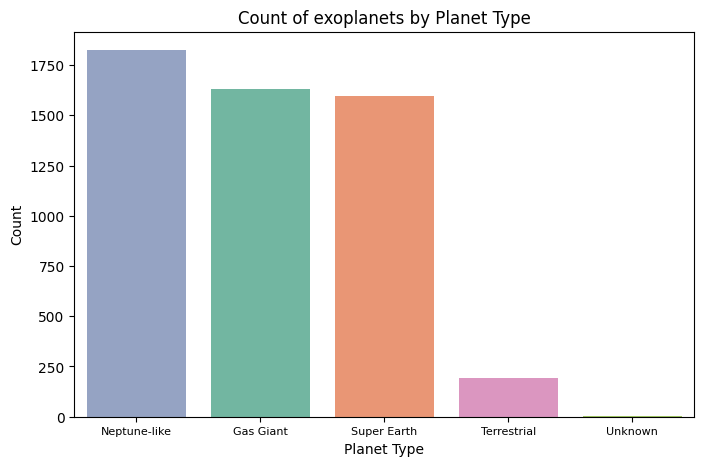

In [22]:
# creating a countplot for planet types
plt.figure(figsize=(8, 5), frameon=True)
sns.countplot(data=exoplanets, x='planet_type', hue='planet_type', palette='Set2', order=planet_type_counts.index, legend=False)
plt.title('Count of exoplanets by Planet Type')
plt.xticks(fontsize=8)
plt.xlabel('Planet Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

### Detection Method Analysis

There are several methods used to detect exoplanets. What are they and which one is the most common?

In [14]:
# counting detection methods
detection_method_counts = exoplanets['detection_method'].value_counts()
print("Count of detection methods:")
print(detection_method_counts)

Count of detection methods:
detection_method
Transit                          3945
Radial Velocity                  1027
Gravitational Microlensing       154 
Direct Imaging                   62  
Transit Timing Variations        24  
Eclipse Timing Variations        17  
Orbital Brightness Modulation    9   
Pulsar Timing                    7   
Astrometry                       2   
Pulsation Timing Variations      2   
Disk Kinematics                  1   
Name: count, dtype: int64


Here is the compact summary of each detection method.

**Transit** – Detects a planet when it passes in front of its star, causing a small, periodic drop in brightness.

**Radial Velocity** – Measures tiny shifts in a star’s spectral lines caused by the gravitational pull of an orbiting planet.

**Gravitational Microlensing** – Observes temporary brightening of a background star when a planet’s gravity magnifies its light.

**Direct Imaging** – Captures actual images of exoplanets by suppressing the host star’s glare.

**Transit Timing Variations** – Identifies planets by measuring irregularities in the timing of transits caused by gravitational interactions.

**Eclipse Timing Variations** – Detects planets by analyzing variations in the timing of eclipses in binary star systems.

**Orbital Brightness Modulation** – Observes changes in the combined light of a star–planet system due to reflection, thermal emission, or ellipsoidal variations.

**Pulsar Timing** – Uses extremely precise pulsar signal timing to detect gravitational effects from orbiting planets.

**Astrometry** – Measures minute shifts in a star’s position on the sky caused by the gravitational influence of a planet.

**Pulsation Timing Variations** – Detects planets by tracking small changes in the pulsation periods of variable stars.

**Disk Kinematics** – Infers planets from disturbances or patterns in the motion of gas and dust within protoplanetary disks.


In [15]:
# grouping exoplanets by planet_type and detection_method
exoplanets_by_detection_method = exoplanets\
    .groupby('planet_type')[['planet_type', 'detection_method']]\
    .value_counts()\
    .unstack(fill_value=0)\
    .astype(int)

exoplanets_by_detection_method

detection_method,Astrometry,Direct Imaging,Disk Kinematics,Eclipse Timing Variations,Gravitational Microlensing,Orbital Brightness Modulation,Pulsar Timing,Pulsation Timing Variations,Radial Velocity,Transit,Transit Timing Variations
planet_type,,,,,,,,,,,
Gas Giant,2,60,1,17,113,4,3,2,728,691,9
Neptune-like,0,0,0,0,31,0,0,0,218,1570,6
Super Earth,0,0,0,0,9,0,3,0,80,1496,7
Terrestrial,0,0,0,0,1,2,1,0,1,188,2
Unknown,0,2,0,0,0,3,0,0,0,0,0


<Figure size 800x500 with 0 Axes>

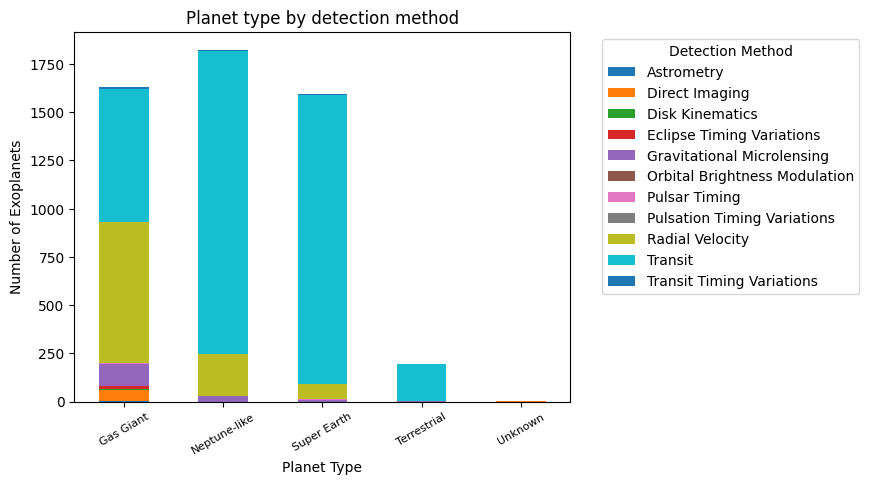

In [54]:
# # creating stacked bar plot
plt.figure(figsize=(8, 5), frameon=True)
exoplanets_by_detection_method.plot(kind='bar', stacked=True)
plt.title('Planet type by detection method')
plt.xlabel('Planet Type')
plt.ylabel('Number of Exoplanets')
plt.xticks(fontsize=8, rotation=30)
plt.legend(title='Detection Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The most common detection method is `Transit` with 3945 exoplanets discovered using this method. The second most common method is `Radial Velocity` with 1027 exoplanets discovered using this method. All other methods have significantly fewer discoveries. Also, it is interesting to note that the `Direct Imaging` method has 62 exoplanets discovered and 2 of them are of `Unknown` planet type.

### Relationship between Planet Type and Detection Method

To analyze the relationship between planet type and detection method, we can create a contingency table and perform a chi-squared test for independence. This will help us determine if there is a significant association between the two categorical variables.

In [55]:
frequency_table = pd.crosstab(exoplanets['planet_type'], exoplanets['detection_method'])
chi2, pval, dof, expected = chi2_contingency(frequency_table)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {pval}")

Chi-squared Statistic: 2580.385837930924
P-value: 0.0


The Chi-Square statistic is used to summarize an association between two categorical variables. The Chi-Square statistic ranges from zero to infinity. The more associated two variables are, the larger the Chi-Square statistic will be.

In our case, the Chi-Squared Statistic is 2581.39 and the p-value is 0. This indicates a strong association between planet type and detection method. Different types of exoplanets are not detected equally across methods — some detection methods are much more likely to find certain types of planets.

### Distance Analysis

In [27]:
# desribe distance column
exoplanets['distance'].describe()

count    5233.000000 
mean     2167.168737 
std      3245.522087 
min      4.000000    
25%      389.000000  
50%      1371.000000 
75%      2779.000000 
max      27727.000000
Name: distance, dtype: float64

In [25]:
# the minimum and maximum distance of exoplanets from earth
min_distance = exoplanets['distance'].min()
max_distance = exoplanets['distance'].max()

print(f"The minimum distance of exoplanets from Earth is {min_distance} light years.")
print(f"The maximum distance of exoplanets from Earth is {max_distance} light years.")

The minimum distance of exoplanets from Earth is 4.0 light years.
The maximum distance of exoplanets from Earth is 27727.0 light years.


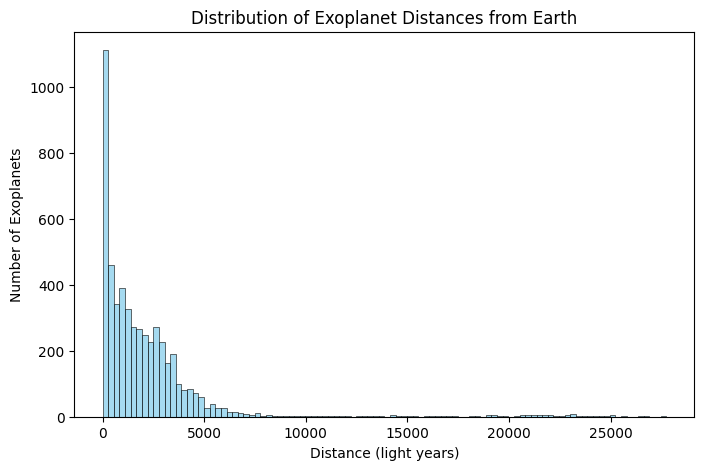

In [33]:
# vizualizing distance distribution by histogram
plt.figure(figsize=(8, 5), frameon=True)
sns.histplot(data=exoplanets, x='distance', bins=100, color='skyblue')
plt.title('Distribution of Exoplanet Distances from Earth')
plt.xlabel('Distance (light years)')
plt.ylabel('Number of Exoplanets')
plt.show()

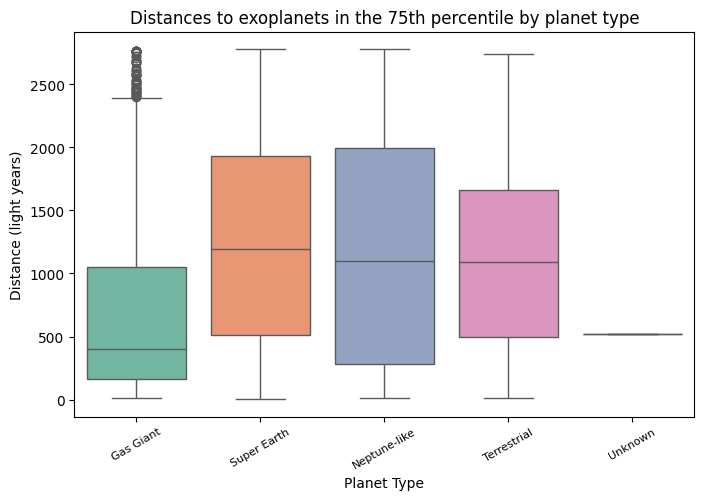

In [38]:
# vizualizing distance distribution by boxplot for 75% of data
distance_75th_percentile = exoplanets['distance'].quantile(0.75)
distance_75_data = exoplanets[exoplanets['distance'] <= distance_75th_percentile]

plt.figure(figsize=(8, 5), frameon=True)
sns.boxplot(data=distance_75_data, x='planet_type', y='distance', hue='planet_type', palette='Set2')
plt.title('Distances to exoplanets in the 75th percentile by planet type')
plt.xlabel('Planet Type')
plt.ylabel('Distance (light years)')
plt.xticks(rotation=30, fontsize=8)
plt.show()

The box plot shows that Gas Giants are typically detected much closer to Earth than other planet types, with a median distance of only a few hundred light-years and many outliers extending beyond 2000 light-years. Super Earths, Neptune-like planets, and Terrestrial planets all have higher median distances (around 1000–1200 light-years), suggesting that these categories are often found farther away.

Let's dive deeper into the analysis of planet types and take a closer look at the `terrestrial` planets.

In [11]:
# filtering planets
filter_by_type = exoplanets['planet_type'] == 'Terrestrial'
terrestrial_planets = exoplanets[filter_by_type]

In [12]:
# displaying planets sorted by distance
terrestrial_planets.head().sort_values(by='distance', ascending=True)

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
151,EPIC 206215704 b,358.0,17.830,Terrestrial,2019,0.972,Earth,1.000,Earth,NaN,0.006297,0.0,Transit
137,EPIC 201497682 b,825.0,13.948,Terrestrial,2019,0.260,Earth,0.692,Earth,NaN,0.005749,0.0,Transit
142,EPIC 201833600 c,840.0,14.705,Terrestrial,2019,0.972,Earth,1.000,Earth,NaN,0.010951,0.0,Transit
152,EPIC 206317286 b,1025.0,14.005,Terrestrial,2019,0.840,Earth,0.960,Earth,NaN,0.004381,0.0,Transit
141,EPIC 201757695.02,1884.0,14.974,Terrestrial,2020,0.688,Earth,0.908,Earth,0.0296,0.005476,0.0,Transit


The nearest exoplanet of `Terrestrial` type is `EPIC 206215704 b`, which is located at a distance of 358 light-years from Earth.

In [13]:
# finding the farthest terrestrial planet
terrestrial_planets[terrestrial_planets['distance'] == terrestrial_planets['distance'].max()]

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
2190,Kepler-1296 b,5061.0,14.934,Terrestrial,2016,0.693,Earth,0.91,Earth,0.0896,0.022998,0.0,Transit


The `Kepler-1296 b` is the farthest terrestrial planet, located at a distance of 5061 light-years from Earth.

### Exoplanets Mass and Radius Analysis

In [64]:
# checking mass_wrt column values
exoplanets['mass_wrt'].value_counts(dropna=False)

mass_wrt
Earth      3586
Jupiter    1641
NaN        23  
Name: count, dtype: int64

In [65]:
# checking radius_wrt column values
exoplanets['radius_wrt'].value_counts(dropna=False)

radius_wrt
Jupiter    3310
Earth      1923
NaN        17  
Name: count, dtype: int64

Masses and Radiuses are expressed in two different units (the mass of Earth and the mass of Jupiter). For further analysis, it is necessary to convert everything to a single system of units - Earth masses and Earth radii.

In [75]:
# Eath mass and radius
mass_earth = 1 # For reference: the mass of the Earth is 5.9722 × 10^24 kg
radius_earth = 1 # For reference: the radius of the Earth is 6371 km

# Jupiter's mass and radius relative to Earth
mass_jupiter_in_earth = 317.8  #1 Jupiter mass = 317.8 Earth masses
radius_jupiter_in_earth = 11.21  #2 Jupiter radius = 11.21 Earth radii

In [76]:
# cleaning exoplanets dataset from NaN values in mass and radius columns
exoplanets_cleaned = exoplanets.dropna(subset=['mass_wrt', 'radius_wrt']).copy()

In [78]:
# adding new columns for mass and radius in Earth units
exoplanets_cleaned['planet_mass'] = exoplanets_cleaned.apply(lambda row: mass_earth * row['mass_multiplier'] if row['mass_wrt'] == 'Earth' \
                                                             else mass_jupiter_in_earth * row['mass_multiplier'], axis=1)

exoplanets_cleaned['planet_radius'] = exoplanets_cleaned.apply(lambda row: radius_earth * row['radius_multiplier'] if row['radius_wrt'] == 'Earth' \
                                                                else radius_jupiter_in_earth * row['radius_multiplier'], axis=1)

exoplanets_cleaned.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,planet_mass,planet_radius
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity,6165.320000,12.1068
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity,4684.372000,12.2189
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity,1525.440000,12.8915
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity,2586.513818,12.5552
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity,565.684000,13.4520


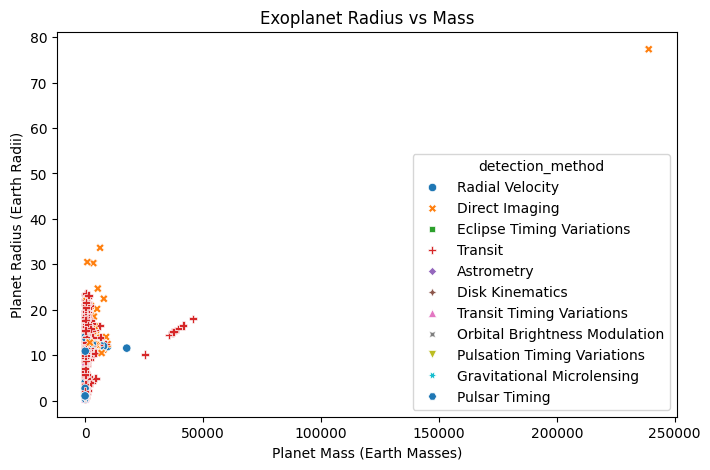

In [88]:
# making scatter plot for radius vs mass
plt.figure(figsize=(8, 5), frameon=True)
sns.scatterplot(data=exoplanets_cleaned, x='planet_mass', y='planet_radius', hue='detection_method', palette='tab10', style='detection_method')
plt.title('Exoplanet Radius vs Mass')
plt.xlabel('Planet Mass (Earth Masses)')
plt.ylabel('Planet Radius (Earth Radii)')
plt.show()

The graph shows one outlier among the planets detected by the `Direct Imaging` method. This may indicate an error in the source data. This should be verified.

In [87]:
exoplanets_cleaned[exoplanets_cleaned['detection_method'] == 'Direct Imaging'].sort_values(by='planet_mass', ascending=False).head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,planet_mass,planet_radius
466,HD 100546 b,358.0,6.69000,Gas Giant,2014,752.0,Jupiter,6.90,Jupiter,53.0,249.2,0.00,Direct Imaging,238985.6,77.3490
1272,HR 2562 b,111.0,6.11000,Gas Giant,2016,30.0,Jupiter,1.11,Jupiter,20.3,80.3,0.00,Direct Imaging,9534.0,12.4431
831,HD 206893 b,133.0,6.68804,Gas Giant,2021,28.0,Jupiter,1.25,Jupiter,9.6,25.6,0.14,Direct Imaging,8898.4,14.0125
1257,HIP 75056 A b,408.0,7.78000,Gas Giant,2021,25.0,Jupiter,2.00,Jupiter,30.0,128.8,0.50,Direct Imaging,7945.0,22.4200
13,2MASS J01225093-2439505 b,110.0,14.24400,Gas Giant,2013,24.5,Jupiter,1.00,Jupiter,52.0,593.2,0.00,Direct Imaging,7786.1,11.2100
